<a href="https://colab.research.google.com/github/hud9925/Classifying-Alzheimer-s/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 2: Exploratory Data Analysis
## Study Design

*   This study used the Alzheimer's Disease dataset from Kaggle
*   Subject pool:
 *  2149 patients
 *  760 diagnosed
 *  Age range: 60-90
 *  32 features

## Ethical Considerations
*   The data did not contain any personal information to begin with so it was safe to use directly.

## Data Selection Process
*   There were no missing target data so there was no need to exlude any entry.

## Cleaning the Data
*   Columns "PatientID" and "DoctorInCharge" were dropped because they provide no meaning for our study.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/alzheimers_disease_data.csv"
#path = "/content/drive/MyDrive/intermediate data science proj 2/alzheimers_disease_data.csv"

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
from datetime import date

In [ ]:
# read data
data = pd.read_csv(path)

print(data.shape)

# check if missing data exists
missing_diagnosis_count = data['Diagnosis'].isnull().sum()
print(f"Number of entry missing the Diagnosis field: {missing_diagnosis_count}")

# drop PatientID, DoctorInCharge
data = data.drop(columns=['PatientID', 'DoctorInCharge'])
print(f'Filtered dataset shape: {data.shape}')

(2149, 35)
Number of entry missing the Diagnosis field: 0
Filtered dataset shape: (2149, 33)


### Inspection on the basic information of the data

In [ ]:
# check the first 5 rows of the data
pd.set_option('display.max_columns', None)
print(data.head())

   Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0   73       0          0               2  22.927749        0   
1   89       0          0               0  26.827681        0   
2   73       0          3               1  17.795882        0   
3   74       1          0               1  33.800817        1   
4   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  \
0           13.297218          6.327112     1.347214      9.025679   
1            4.542524          7.619885     0.518767      7.151293   
2           19.555085          7.844988     1.826335      9.673574   
3           12.209266          8.428001     7.435604      8.392554   
4           18.454356          6.310461     0.795498      5.597238   

   FamilyHistoryAlzheimers  CardiovascularDisease  Diabetes  Depression  \
0                        0                      0         1           1   
1                        0            

In [ ]:
# check the data distribution of each column
pd.options.display.float_format = '{:.5f}'.format
print(data.describe())

             Age     Gender  Ethnicity  EducationLevel        BMI    Smoking  \
count 2149.00000 2149.00000 2149.00000      2149.00000 2149.00000 2149.00000   
mean    74.90879    0.50628    0.69753         1.28664   27.65570    0.28851   
std      8.99022    0.50008    0.99613         0.90453    7.21744    0.45317   
min     60.00000    0.00000    0.00000         0.00000   15.00885    0.00000   
25%     67.00000    0.00000    0.00000         1.00000   21.61141    0.00000   
50%     75.00000    1.00000    0.00000         1.00000   27.82392    0.00000   
75%     83.00000    1.00000    1.00000         2.00000   33.86978    1.00000   
max     90.00000    1.00000    3.00000         3.00000   39.99277    1.00000   

       AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  \
count          2149.00000        2149.00000   2149.00000    2149.00000   
mean             10.03944           4.92020      4.99314       7.05108   
std               5.75791           2.85719      2.90905 

In [ ]:
# check the missing values
data.isnull().sum()

,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0
SleepQuality,0


### Visualize the data

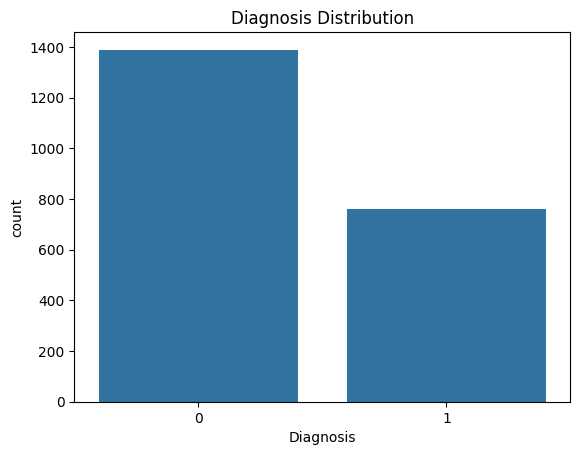

Diagnosis
0    1389
1     760
Name: count, dtype: int64


In [ ]:
# target distribution
target = "Diagnosis"
sns.countplot(x=target, data=data)
plt.title("Diagnosis Distribution"); plt.show()
print(data[target].value_counts())

*   The bar plot shows a modest class imbalance, roughly two-thirds of participants have no Alzheimer's diagnosis versus one-third who do. Flagging the need for stratified splits when we train models.

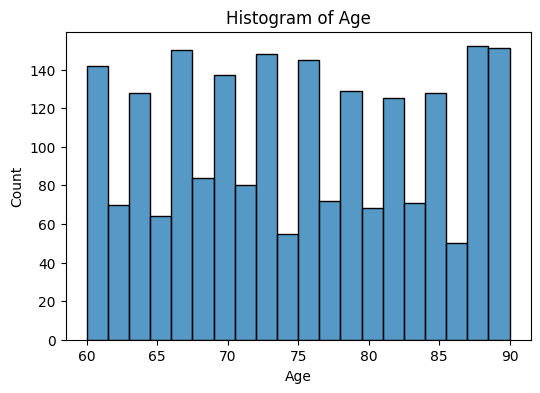

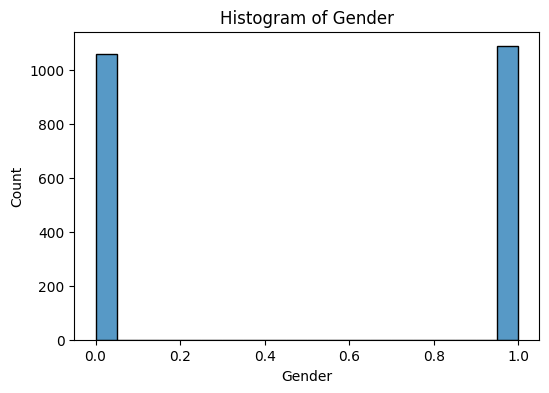

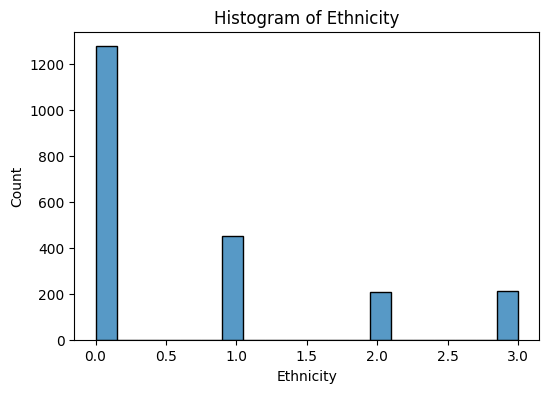

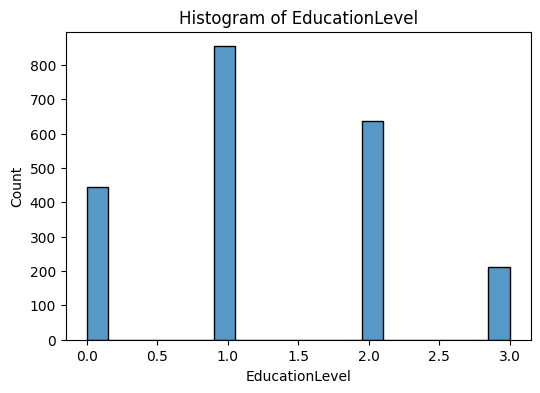

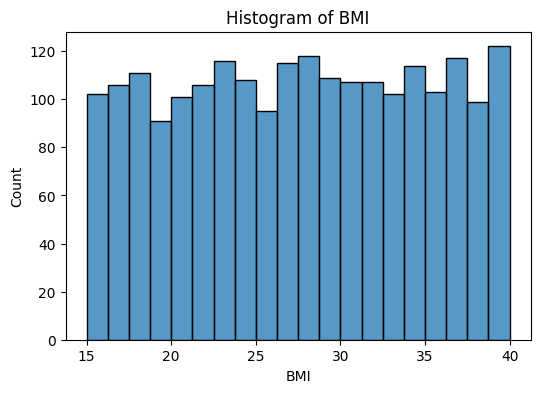

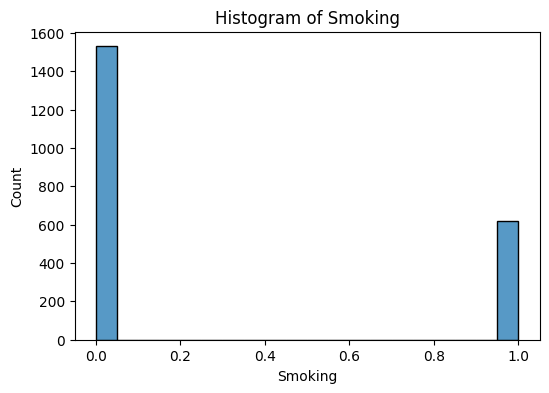

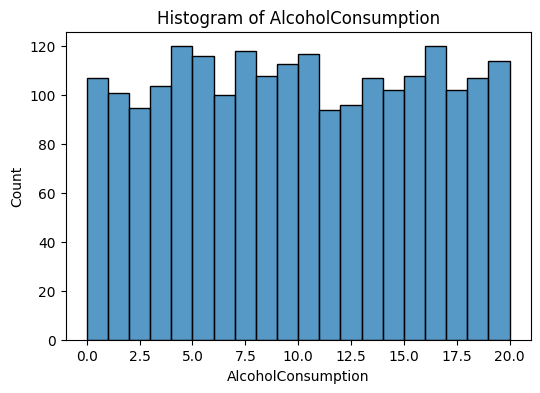

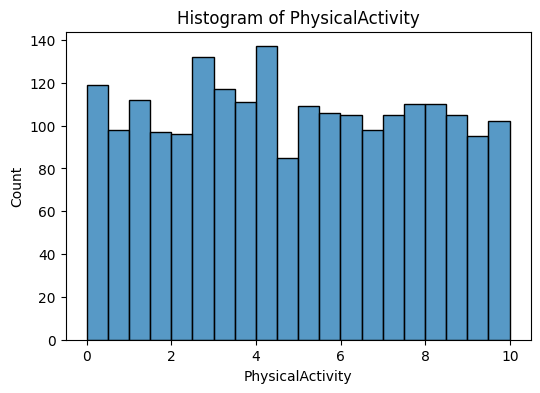

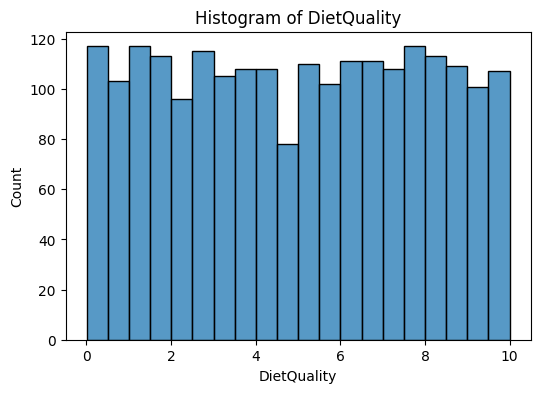

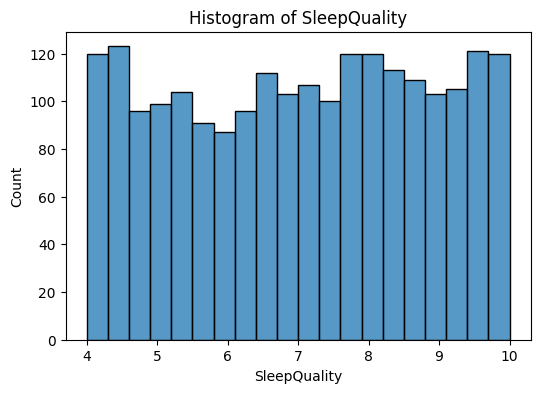

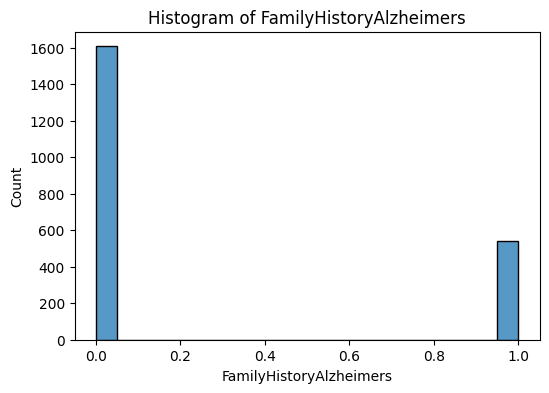

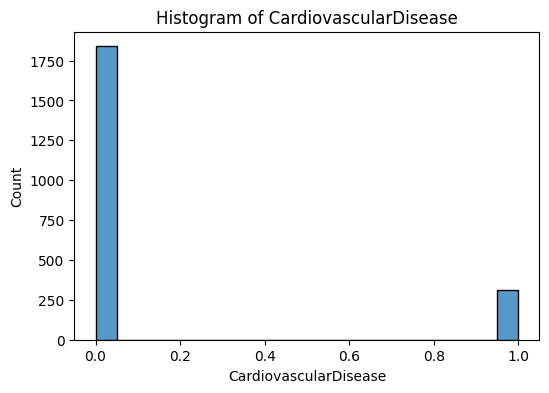

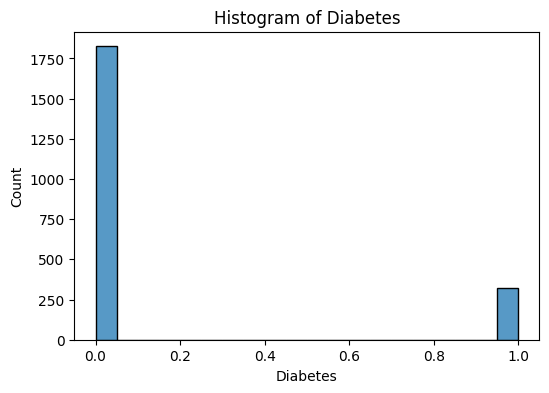

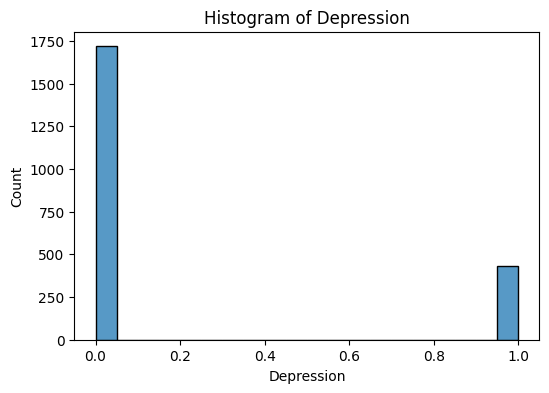

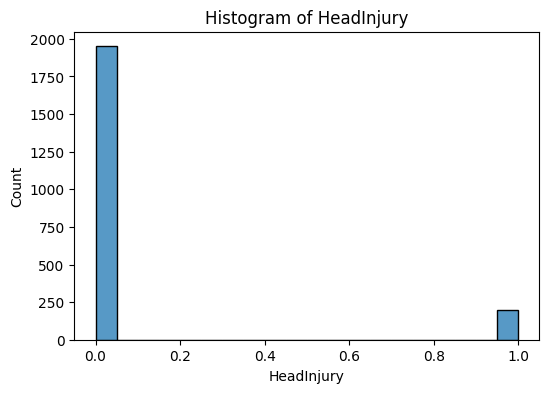

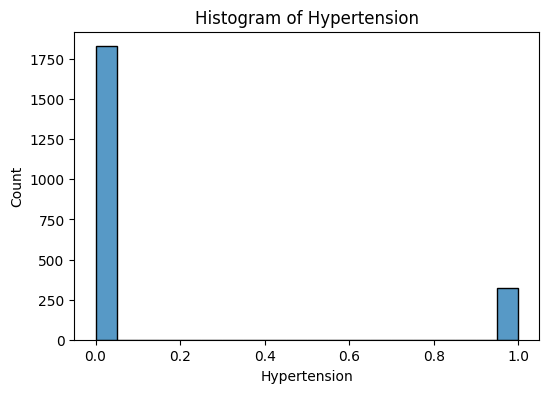

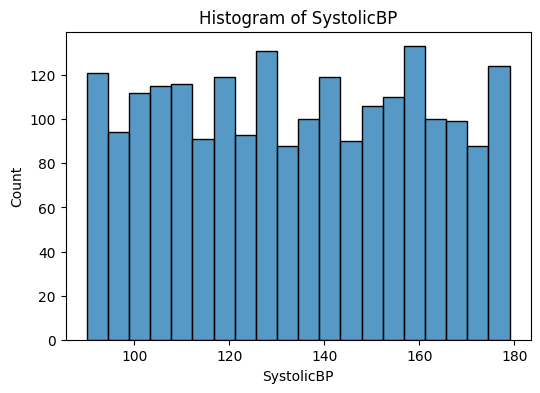

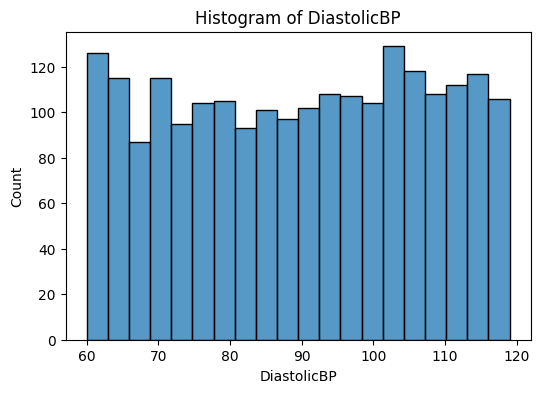

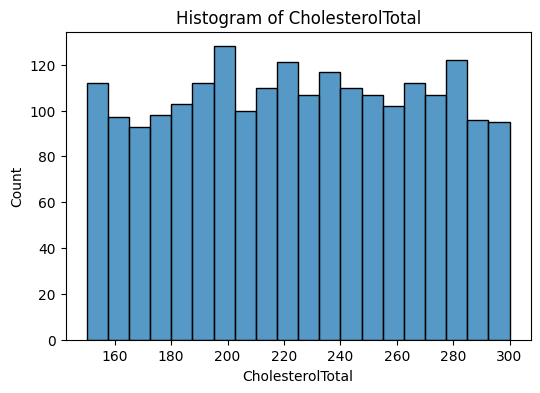

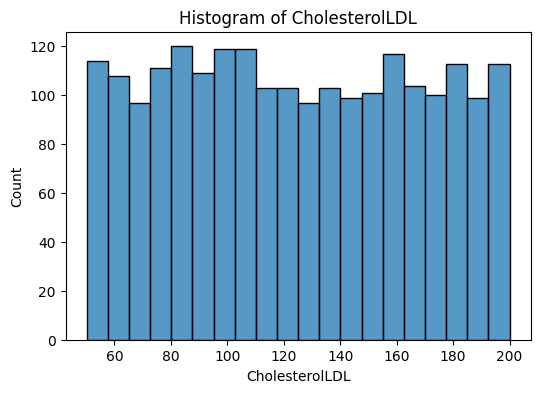

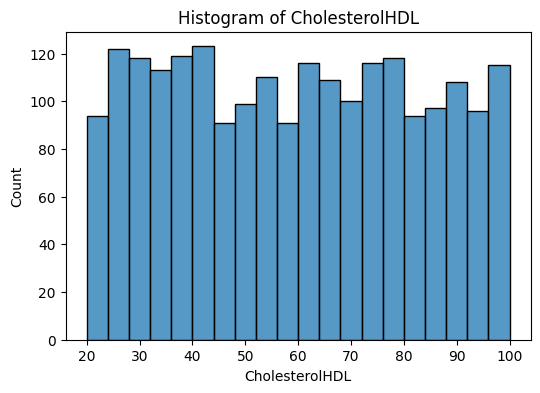

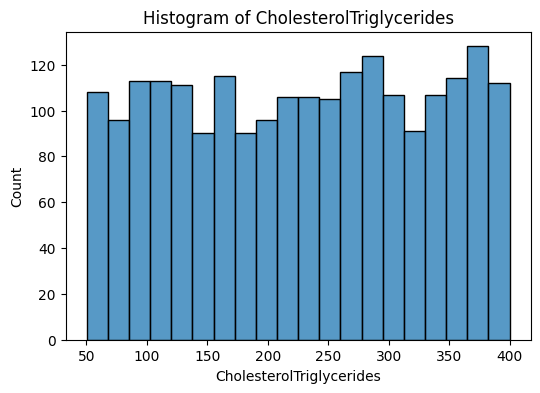

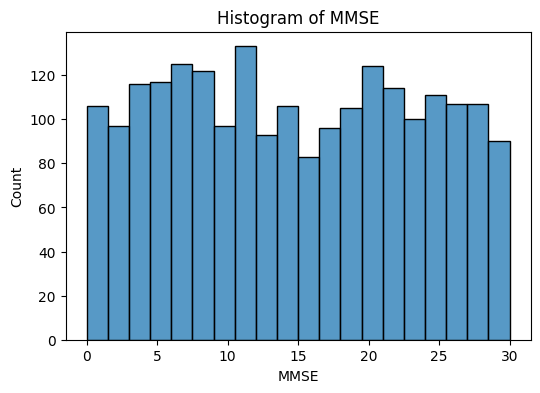

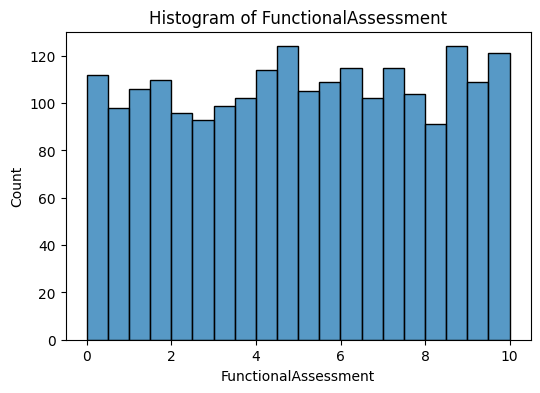

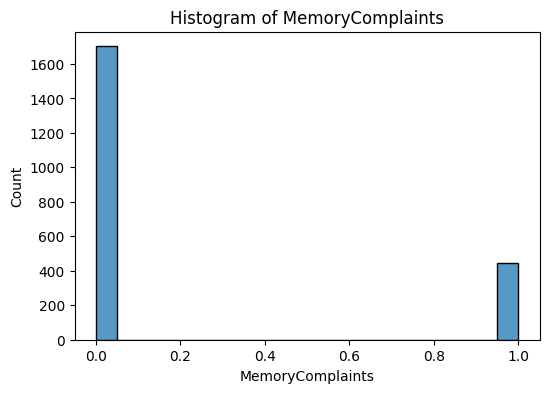

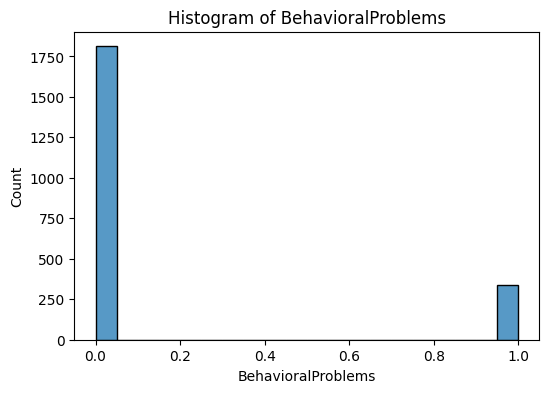

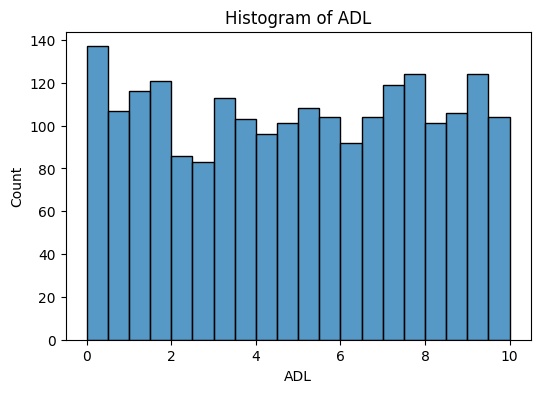

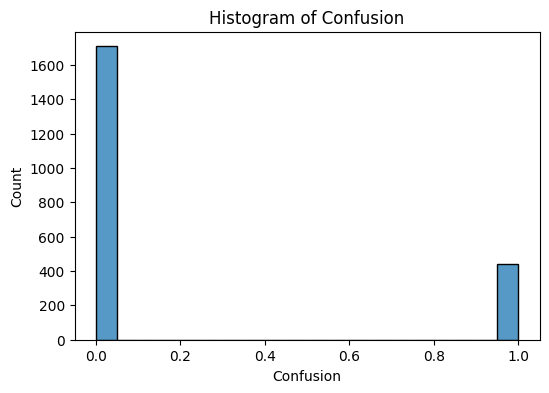

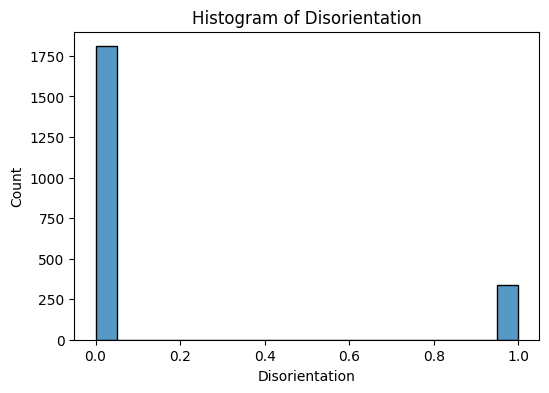

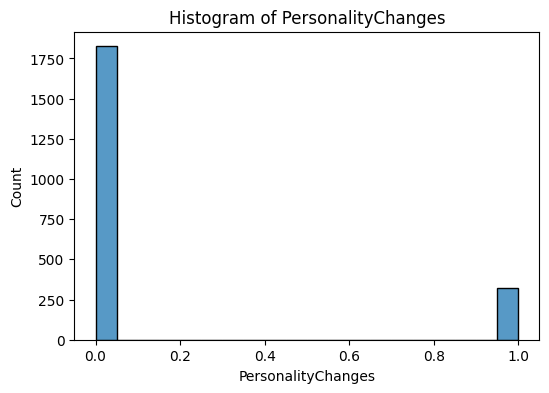

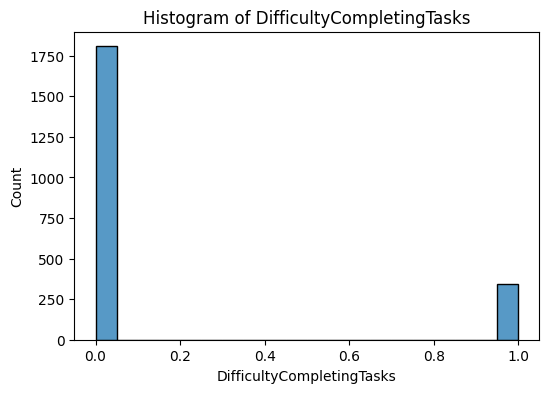

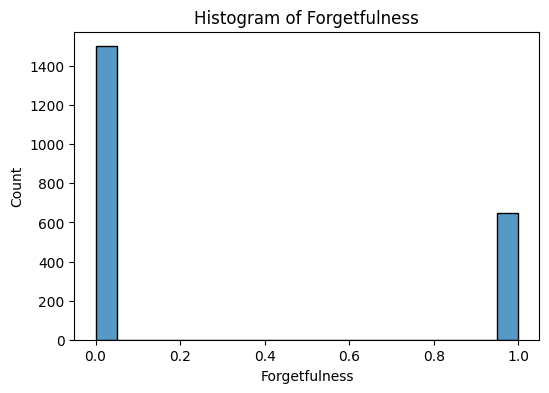

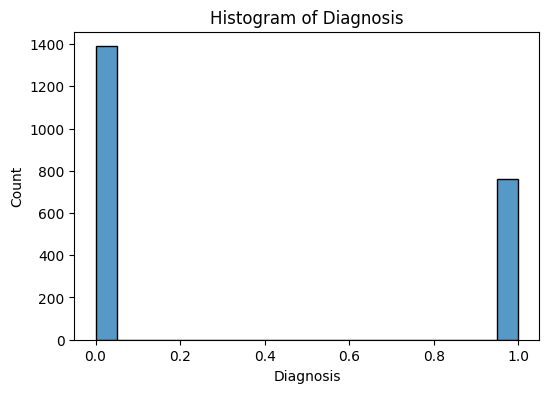

In [ ]:
for col in data.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col],bins=20)
    plt.xlabel(col)
    plt.title(f'Histogram of {col}')
    plt.show()

*   Spreaded fairly evenly without an extreme skew towards either end.
*   Gender distribution is also balanced.

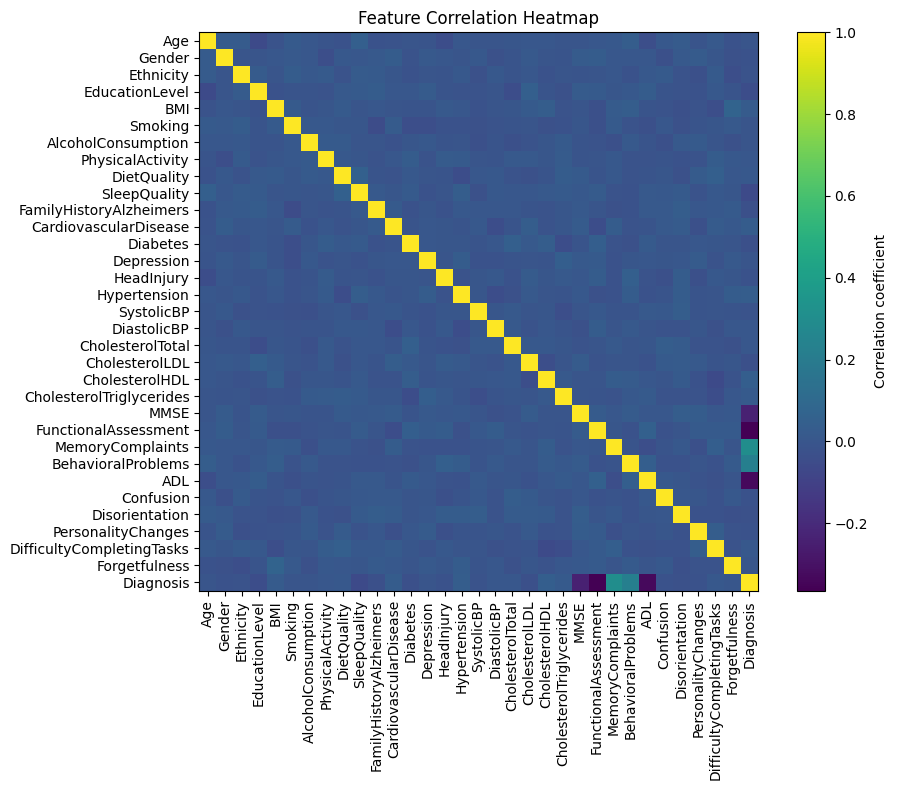

In [ ]:
# correlation heatmap
corr = data.corr()
plt.figure(figsize=(10, 8))

plt.imshow(corr, interpolation='nearest')
plt.colorbar(label='Correlation coefficient')

labels = corr.columns
plt.xticks(range(len(labels)), labels, rotation=90)
plt.yticks(range(len(labels)), labels)

plt.title('Feature Correlation Heatmap')

plt.tight_layout()
plt.show()

*   Most cells have absolute r values that are below about 0.1, so multicollinearity is generally low.
*   MMSE, functional assessment, memory complaints, behavioral problems, ADL are shown to have high correlation values with diagnosis, which means they might be important features for the models, so we will use pairplots to highlight their interactions.

In [ ]:
# high correlation features
threshold = 0.1
features = corr.index[abs(corr["Diagnosis"]) > threshold].tolist()
features.remove("Diagnosis")
high_corr_features = corr.index[abs(corr["Diagnosis"]) > 0.1].tolist()
high_corr_features.remove("Diagnosis")

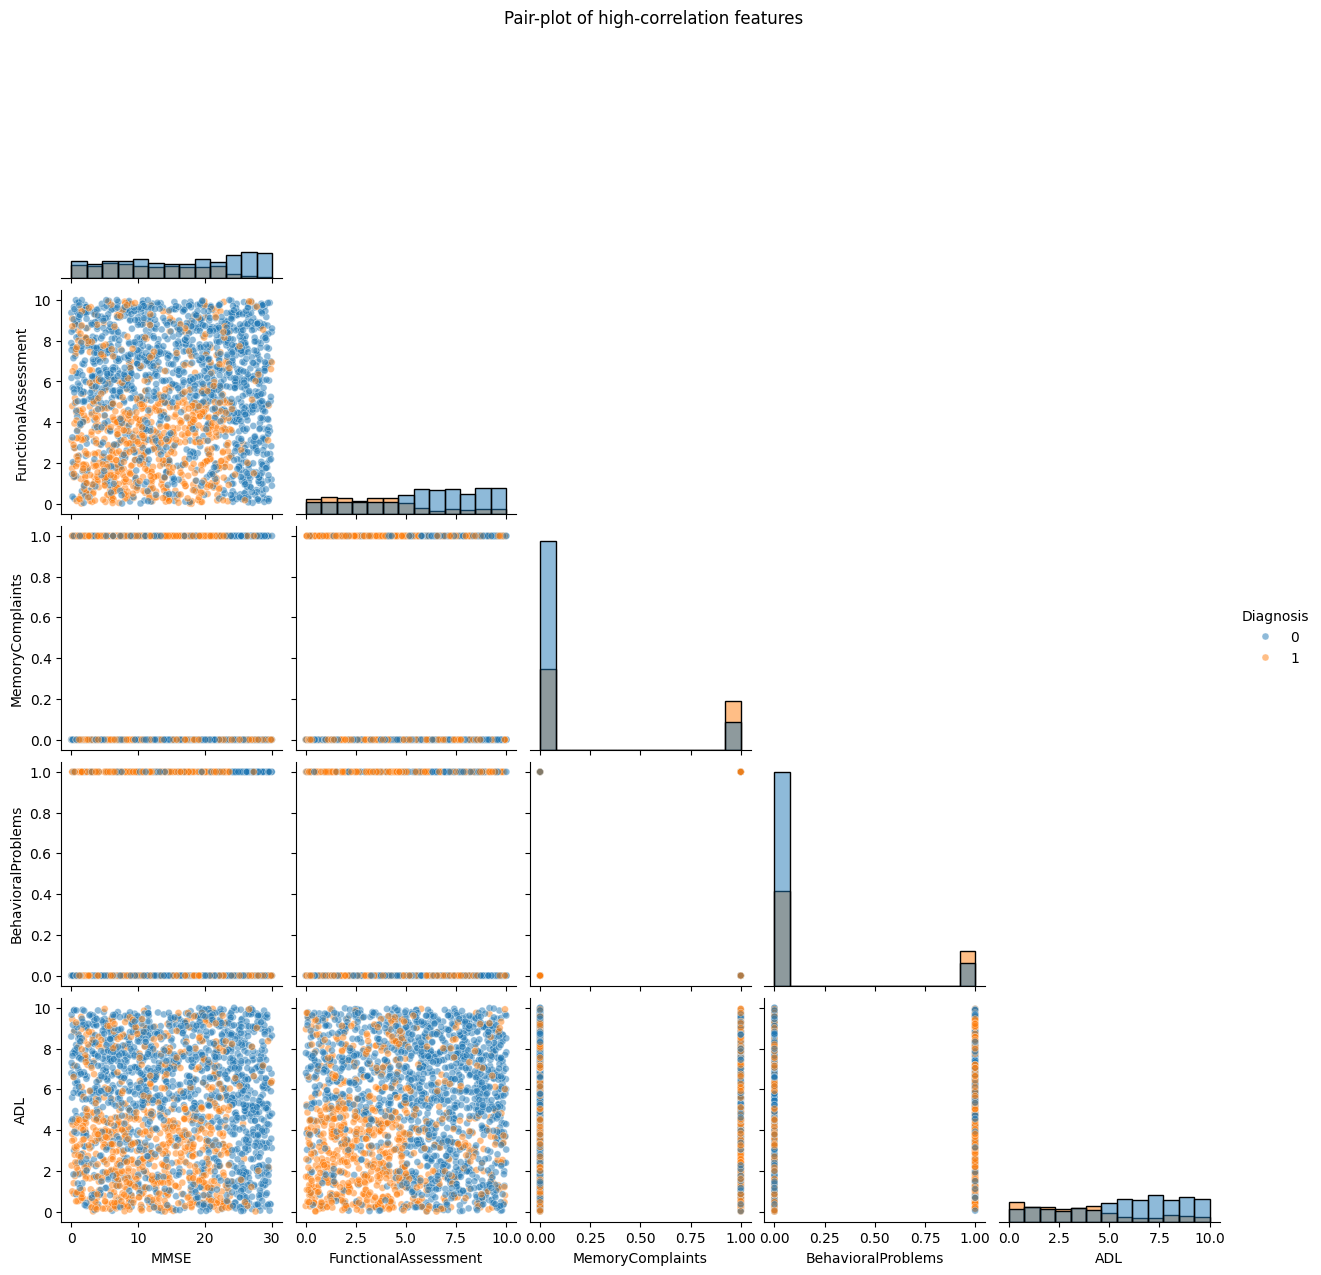

In [ ]:
pair_df = data[high_corr_features + [target]]

sns.pairplot(pair_df,
             vars=high_corr_features, hue=target, corner=True,
             diag_kind="hist", plot_kws={"alpha":0.5, "s":25})

plt.suptitle("Pair-plot of high-correlation features", y=1.02)
plt.show()

*   From the single-feature histograms on the diagonal, clear separators already emerge: for example, MMSE scores above approximately 24 are overwhelmingly associated with patients without Alzheimer's.
*   When we examine feature pairs, MMSE vs. Functional Assessment, MMSE vs. ADL, and Functional Assessment vs. ADL, the two diagnostic groups form almost completely separable clusters.
*   These patterns suggest that tree-based models, which can capture non-linear decision boundaries, are well suited to this problem. We will therefore benchmark decision-tree classifiers against a logistic-regression baseline to quantify any performance gains.


# Part 3: Models


## Logistic Regression

In [ ]:
# Logistic Regression --> predicting binary outcome; has (1)  or does not have (0) alzhemiers

In [ ]:
# data train
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']  # 0 = no AD, 1 = AD

#
X = pd.get_dummies(
    X,
    columns=['Ethnicity','EducationLevel'],
    drop_first=True
)
# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, train_size=0.8, random_state=42
)
scaler    = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)

# Fit Logistic Regression
model = LogisticRegression(solver='liblinear', max_iter=500, random_state=42)
model.fit(X_train_s, y_train)

# 7. Evaluate
y_pred = model.predict(X_test_s)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print(classification_report(
    y_test, y_pred,
    target_names=['No Alzheimer’s','Alzheimer’s']
))

Accuracy: 0.82
                precision    recall  f1-score   support

No Alzheimer’s       0.85      0.86      0.86       278
   Alzheimer’s       0.74      0.73      0.74       152

      accuracy                           0.82       430
     macro avg       0.80      0.80      0.80       430
  weighted avg       0.82      0.82      0.82       430



Confusion matrix:
 [[240  38]
 [ 41 111]]


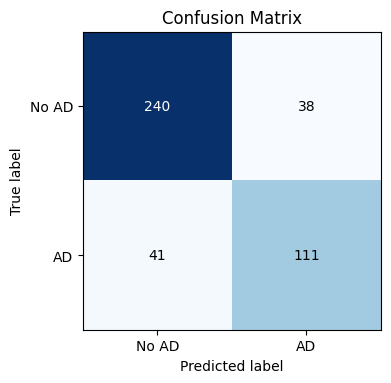

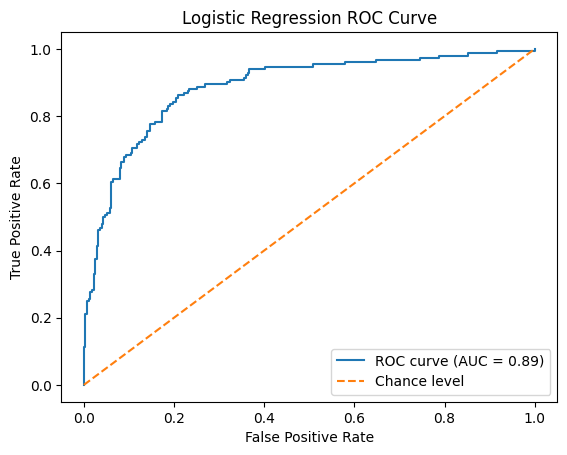

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

plt.figure(figsize=(4,4))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks([0,1], ['No AD','AD'])
plt.yticks([0,1], ['No AD','AD'])
for i in (0,1):
    for j in (0,1):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j]>cm.max()/2 else 'black')
plt.tight_layout()
plt.show()


# coef_df = pd.DataFrame({
#     'feature': all_feats,
#     'coef'   : pipeline.named_steps['clf'].coef_[0]
# })

from sklearn.metrics import roc_curve, auc

y_proba = model.predict_proba(X_test_s)[:, 1]

# Get false-positive and true-positive rates
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], '--', label='Chance level')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc='lower right')
plt.show()

The logistic regression model achieves a solid overall accuracy of 82%, correctly classifying roughly four out of five patients. This model tells us that ~85% of Alzheimer's patients were identified (sensitivity), while ~74% of the sample without Alzhemiers were identified correctly(specificity). This balance yields a respectable average F1‐score, but the lower sensitivity for Alzheimer’s suggests a risk of missed diagnoses.

Top 10 features

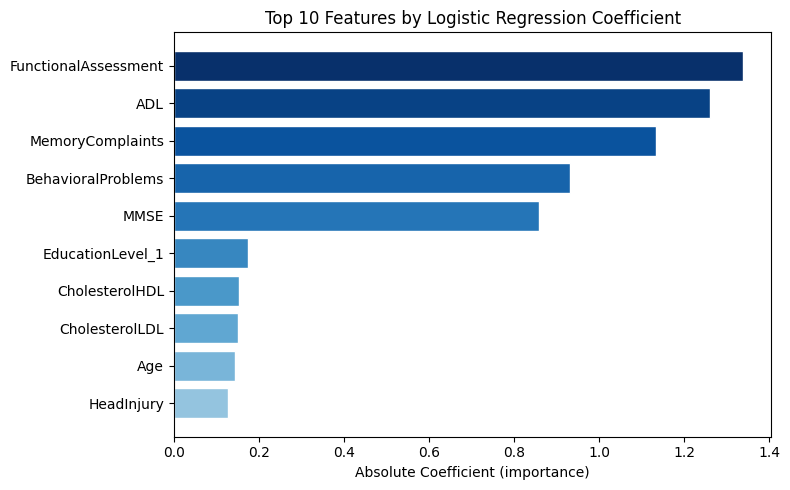

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Extract the learned coefficients; one per feature)
coefs = model.coef_[0]              # shape = (n_features,)

# Compute absolute impact
importances = np.abs(coefs)

# Map back to feature names
feature_names = X_train.columns
imp_series = pd.Series(importances, index=feature_names)

# Select top 10
top10 = imp_series.sort_values(ascending=False).head(10)
top10_sorted = top10.sort_values()

# Plot
colors = plt.cm.Blues(np.linspace(0.4, 1.0, len(top10_sorted)))
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(top10_sorted.index, top10_sorted.values, color=colors, edgecolor='white')
ax.set_xlabel('Absolute Coefficient (importance)')
ax.set_title('Top 10 Features by Logistic Regression Coefficient')
plt.tight_layout()
plt.show()


## Random Forest

Dropping columns: []
Number of features: 36
Accuracy: 0.944
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       278
           1       0.94      0.89      0.92       152

    accuracy                           0.94       430
   macro avg       0.94      0.93      0.94       430
weighted avg       0.94      0.94      0.94       430

Confusion Matrix:
 [[270   8]
 [ 16 136]]


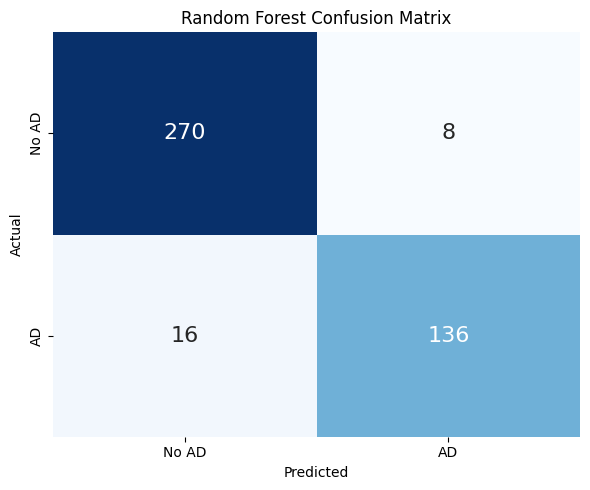

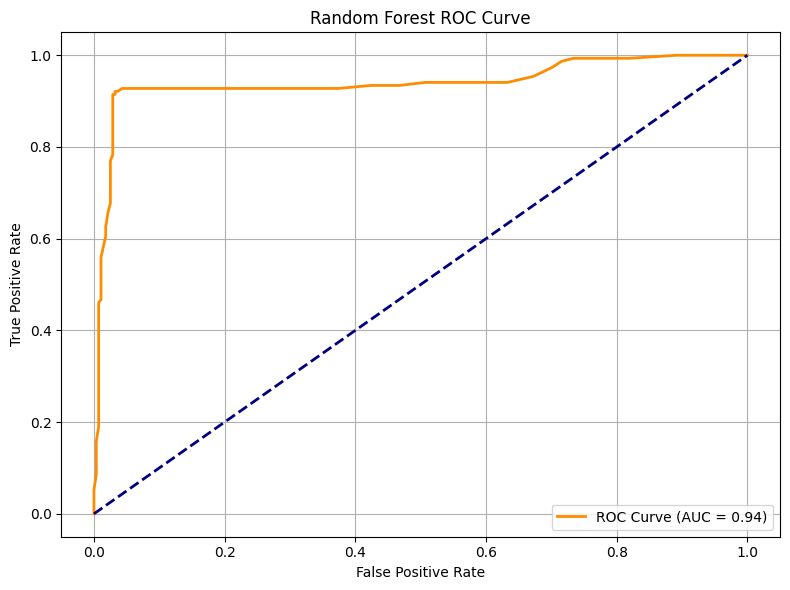

In [ ]:

df = data.copy()

# Drop patientid, doctorincharge Columns
columns_to_drop = [col for col in df.columns if col.lower() in ['patientid', 'doctorincharge']]
print("Dropping columns:", columns_to_drop)
df = df.drop(columns=columns_to_drop)

# Random Forest Classifier model building
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']
X = pd.get_dummies(
    X,
    columns=['Ethnicity','EducationLevel'],
    drop_first=True
)
print("Number of features:", X.shape[1])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Metríc
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {acc:.3f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)

# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["No AD", "AD"], yticklabels=["No AD", "AD"], annot_kws={"size":16})
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC Curve

y_probs = rf_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

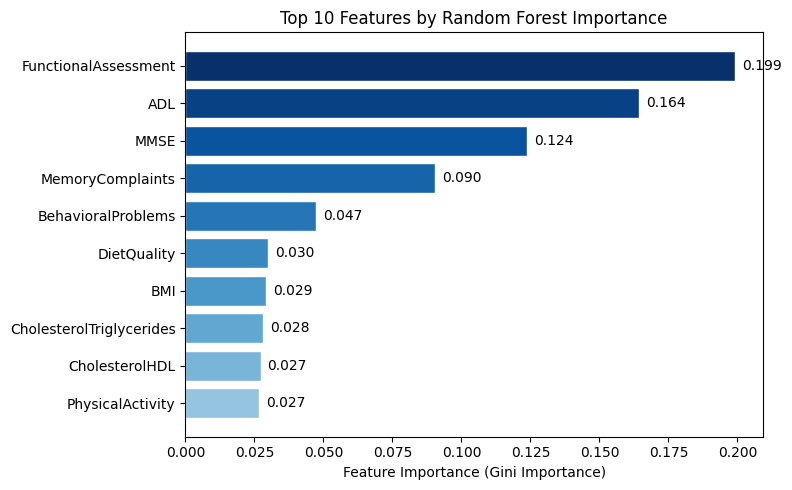

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get Top 10 important features
importances = rf_model.feature_importances_

feature_names = X.columns
imp_series = pd.Series(importances, index=feature_names)

# Visualize top 10 features
top10 = imp_series.sort_values(ascending=False).head(10)
top10_sorted = top10.sort_values()

colors = plt.cm.Blues(np.linspace(0.4, 1.0, len(top10_sorted)))

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.barh(top10_sorted.index, top10_sorted.values, color=colors, edgecolor='white')

ax.set_xlabel('Feature Importance (Gini Importance)')
ax.set_title('Top 10 Features by Random Forest Importance')

for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{width:.3f}', xy=(width, bar.get_y() + bar.get_height()/2),
                xytext=(5, 0), textcoords="offset points",
                ha='left', va='center')

plt.tight_layout()
plt.show()


Random Forest model yielded 94% in overall accuracy, classifying 269 True Positive, and 134 True Negative. The precision for accurate prediction of Alzheimer's Disease is 94%, and a recall of 88%.

While quite accurately predicting patients with Alzheimer's and refraining from falsely predicting patients without, high level of flase negative means looking over patients with AD means a chance of clinical error happening.

## XGBoost

In [ ]:
#imports (standard)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing dataset
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/Y5S2/DataScience/intermediate data science proj 2")

df = pd.read_csv("alzheimers_disease_data.csv")
df.tail()

In [ ]:
#dropping patient id & doctor in charge
df = df.drop(columns=['PatientID', 'DoctorInCharge'])
df.tail()

In [ ]:
#train and test sets
#imports
from sklearn.model_selection import train_test_split

#creating train and test sets
y = df["Diagnosis"]
X = df.drop(columns=["Diagnosis"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [ ]:
#XGBoost Classifier
import xgboost as xgb

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
#results
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

plt.figure(figsize=(4,4))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('XGBoost Model Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks([0,1], ['No AD','AD'])
plt.yticks([0,1], ['No AD','AD'])
for i in (0,1):
    for j in (0,1):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j]>cm.max()/2 else 'black')
plt.tight_layout()
plt.show()

In [ ]:
#calculating feature importance
importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('XGBoost Top 10 Predictive Factors for Alzheimer\'s Disease')
plt.tight_layout()
plt.show()

In [ ]:
#xgboost decison tree
from xgboost import plot_tree

plt.figure(figsize=(20,10))
for i in range(0, 100, 10):
    plot_tree(model, num_trees=i)
    plt.title(f"XGBoost Decision Tree {i}")
    plt.show()

### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

#balancing datasets with smote
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

model2 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model2.fit(X_train_res, y_train_res)

y_pred2 = model2.predict(X_test)
y_prob2 = model2.predict_proba(X_test)[:, 1]

In [ ]:
#results
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred2)
print("Confusion matrix:\n", cm)

plt.figure(figsize=(4,4))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks([0,1], ['No AD','AD'])
plt.yticks([0,1], ['No AD','AD'])
for i in (0,1):
    for j in (0,1):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j]>cm.max()/2 else 'black')
plt.tight_layout()
plt.show()

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob2)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--", label="Baseline")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SMOTE XGBoost ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()